In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize the pixel values between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
def create_mobilenet_model(input_shape, num_classes):
    model = Sequential()
    model.add(MobileNet(input_shape=input_shape, include_top=False, pooling='avg', weights='imagenet'))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model


In [ ]:
# Define the input shape and the number of classes
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

# Create the MobileNet model
model = create_mobilenet_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=2, validation_data=(X_test, y_test))


Epoch 1/2
391/391 [==============================] - 543s 1s/step - loss: 1.2090 - accuracy: 0.6066 - val_loss: 0.8010 - val_accuracy: 0.7221
Epoch 2/2
391/391 [==============================] - 522s 1s/step - loss: 0.7357 - accuracy: 0.7580 - val_loss: 0.6928 - val_accuracy: 0.7621


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 12s 38ms/step - loss: 0.6928 - accuracy: 0.7621
Test Loss: 0.6928312182426453
Test Accuracy: 0.7620999813079834


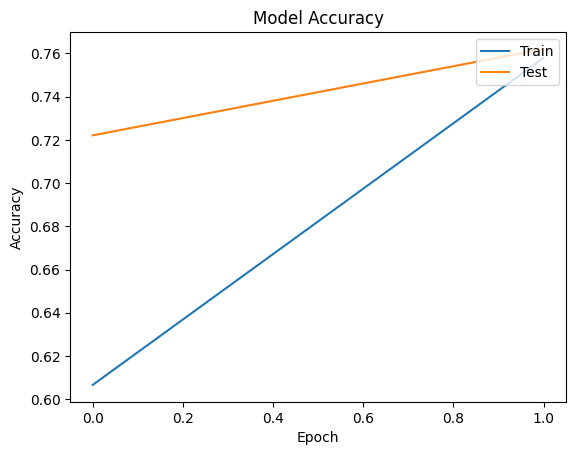

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper right')


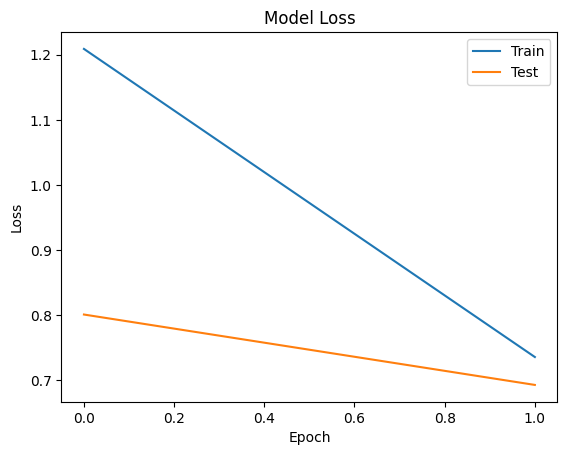

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
